# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import fabs
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3 

In [2]:
path = 'https://code.s3.yandex.net/datasets/'
session_history=pd.read_csv(path+'sessions_project_history.csv')
sessions_test_part = pd.read_csv(path+'sessions_project_test_part.csv')
sessions_test = pd.read_csv(path+'sessions_project_test.csv')

In [3]:
session_history.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [4]:
result = session_history.groupby('user_id')['session_id'].nunique().reset_index().sort_values(by='session_id', ascending=False)
print(result)

                 user_id  session_id
8948    10E0DEFC1ABDBBE0          10
55627   6A73CB5566BB494D          10
72346   8A60431A825D035B           9
109383  D11541BAC141FB94           9
47956   5BCFE7C4DCC148E9           9
...                  ...         ...
15859   1DF13BB1953B3497           1
51449   628502A3CE7E0A3C           1
15853   1DEEF40DEFBD0C65           1
89905   AC08479B7472C628           1
72184   8A0882B6715D9EE5           1

[134039 rows x 2 columns]


In [5]:
max_sessions_user = session_history.groupby('user_id')['session_id'].nunique().idxmax()

# Вывести все записи для этого пользователя
user_sessions = session_history[session_history['user_id'] == max_sessions_user]

print(user_sessions)

                 user_id        session_id session_date     session_start_ts  \
115558  10E0DEFC1ABDBBE0  B8F0423BBFFCF5DC   2025-08-14  2025-08-14 13:57:39   
191751  10E0DEFC1ABDBBE0  87CA2FA549473837   2025-08-15  2025-08-15 16:42:10   
239370  10E0DEFC1ABDBBE0  4ADD8011DCDCE318   2025-08-16  2025-08-16 19:53:21   
274629  10E0DEFC1ABDBBE0  DF0FD0E09BF1F3D7   2025-08-17  2025-08-17 15:03:43   
302501  10E0DEFC1ABDBBE0  3C221774B4DE6885   2025-08-18  2025-08-18 17:29:14   
325557  10E0DEFC1ABDBBE0  031BD7A67048105B   2025-08-19  2025-08-19 13:23:55   
345336  10E0DEFC1ABDBBE0  FF4315CF4AD4B100   2025-08-20  2025-08-20 19:31:54   
377532  10E0DEFC1ABDBBE0  4045FEA0747203B4   2025-08-22  2025-08-22 17:54:13   
403538  10E0DEFC1ABDBBE0  344B086C421C7F37   2025-08-24  2025-08-24 14:46:13   
414743  10E0DEFC1ABDBBE0  054F20BA371E4C9D   2025-08-25  2025-08-25 18:36:41   

       install_date  session_number  registration_flag  page_counter region  \
115558   2025-08-14               1     

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [6]:
users_count = session_history.groupby('session_date').agg({'user_id' : pd.Series.nunique,
                                                            'registration_flag' : 'sum'}).reset_index()

users_count = users_count.rename(columns = {'user_id' : 'users_total',
                                            'registration_flag': 'registered_users_total'})

users_count['registered_users_share'] = users_count['registered_users_total'] / users_count['users_total']

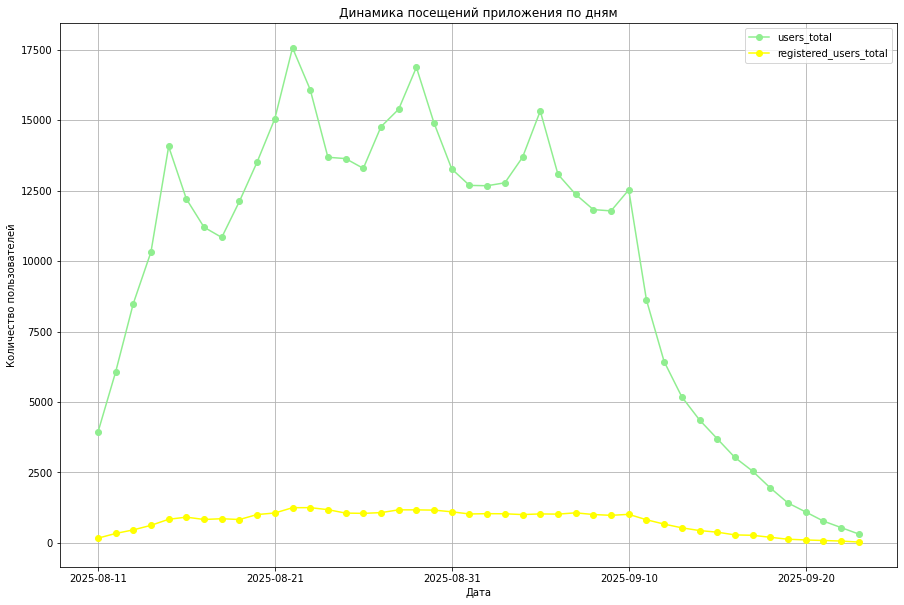

In [7]:
users_count.plot(kind = 'line',
                 x = 'session_date',
                 y = ['users_total','registered_users_total'],
                 title = 'Динамика посещений приложения по дням',
                 ylabel = 'Количество пользователей',
                 xlabel = 'Дата',
                 legend = True,
                 grid = True,
                 figsize = (15,10),
                 marker = 'o',
                 color = ['lightgreen' ,'yellow']
                 )

plt.show()

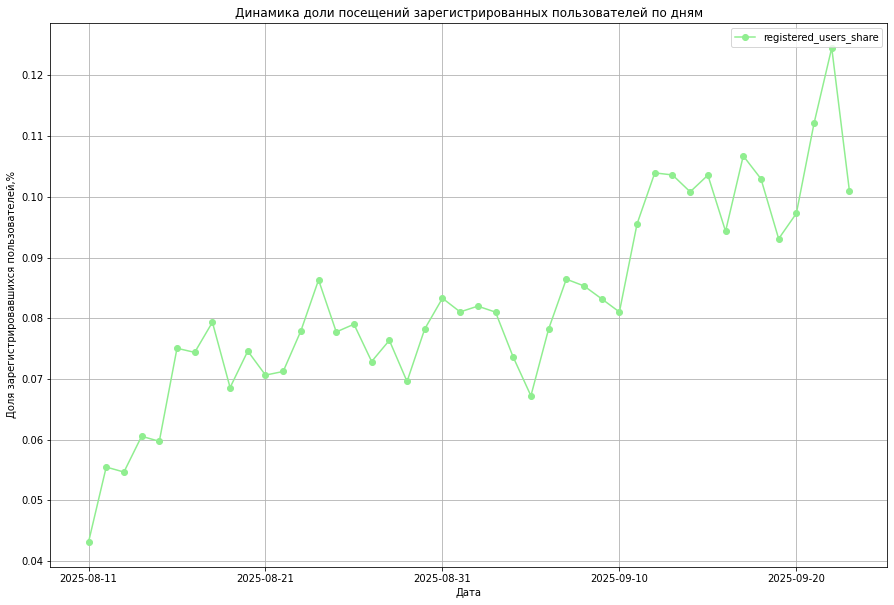

In [8]:
users_count.plot(kind = 'line',
                           x = 'session_date',
                           y = 'registered_users_share',
                           title = 'Динамика доли посещений зарегистрированных пользователей по дням',
                           ylabel = 'Доля зарегистрировавшихся пользователей,%',
                           xlabel = 'Дата',
                           legend = True,
                           grid = True,
                           figsize = (15,10),
                           marker = 'o',
                           color = 'lightgreen'
                          )

plt.show()

Действительно, изменение доли зарегистрированных пользователей от общего количество пользователей, посетивших приложение, более динамично.

Из-за того что в сентябре наблюдается заметное снижение общего количества пользователей при незначительно изменившемся количестве зарегистрированных пользователей, мы наблюдаем рост доли зарегистрированных пользователей, посетивших приложение.

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

In [9]:
session_count_by_pages = session_history.groupby('page_counter')['session_id'].count().reset_index()
session_count_by_pages = session_count_by_pages.rename(columns = {'session_id' : 'sessions_count'})

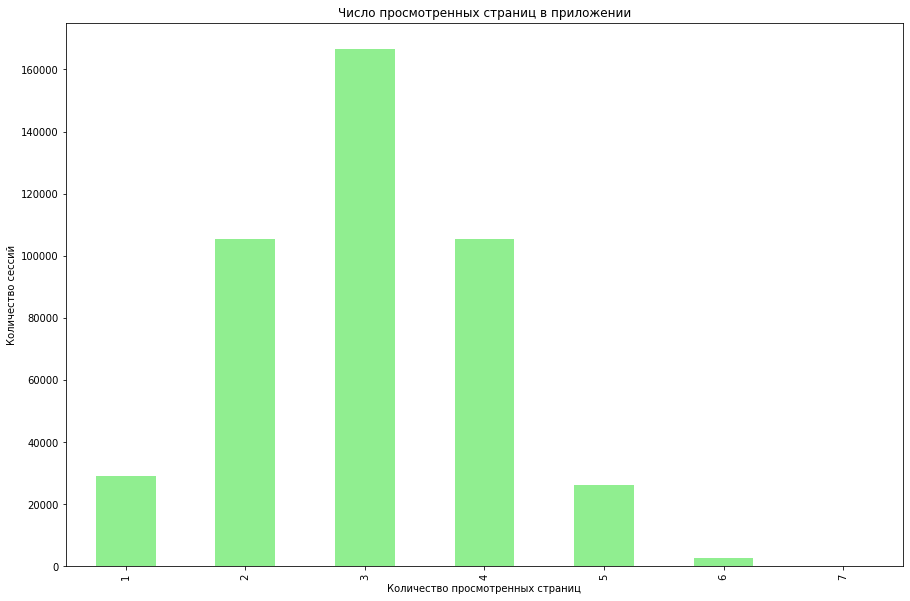

In [10]:
session_count_by_pages.plot(kind = 'bar',
                           x = 'page_counter',
                           y = 'sessions_count',
                           title = 'Число просмотренных страниц в приложении',
                           ylabel = 'Количество сессий',
                           xlabel = 'Количество просмотренных страниц',
                           legend = False,
                           grid = False,
                           figsize = (15,10),
                           color = 'lightgreen'
                         )
plt.show()

На диаграмме видно, что наиболее частое количество просмотренных страниц в рамках одной сессии - 3. Примерно одинаковое количество сессий приходится на 2 и 4 страницы, а также на 1 и 5 страниц. 6 или 7 страниц в рамках одной сессии просматривает гораздо меньшее количество пользователей.

Такие результаты говорят о том, что у пользователей приложения есть некоторая вовлеченность, однако после достижения трех страниц, вовлеченность начинает снижаться. Необходимо проанализировать причины таких показателей детально для того, чтобы разработать меры по повышению удежания пользователей в приложении.

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

In [11]:
def good_session(df):
    """
    Создает столбец с признаком good_session

    Parameters:
        df (name of pd.DataFrame): Датафрейм для обработки.
    """
    if df['page_counter'] >= 4:
        return 1
    else:
        return 0

In [12]:
session_history['good_session'] = session_history.apply(good_session,axis = 1)
successful_sessions = session_history.groupby(['user_id','session_date']).agg({'session_id': 'count',
                                                                                'good_session' : 'sum'}).reset_index()

successful_sessions = successful_sessions.rename(columns = { 'session_id' : 'total_sessions',
                                                             'good_session' : 'good_sessions_total'})
successful_sessions['good_sessions_share'] = successful_sessions['good_sessions_total'] / successful_sessions['total_sessions']

successful_sessions = successful_sessions.groupby('session_date')['good_sessions_share'].mean().reset_index()

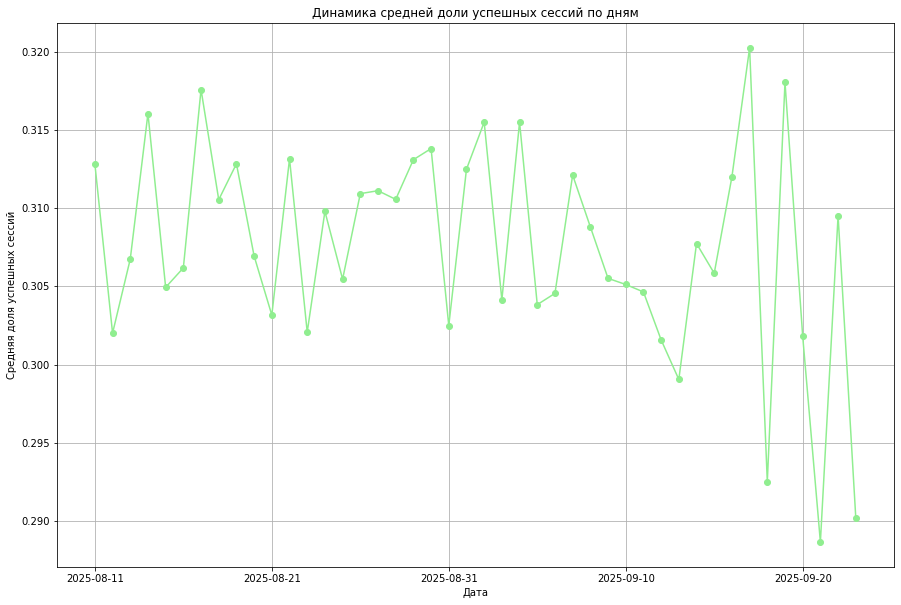

In [13]:
visual = successful_sessions.plot(kind = 'line',
                           x = 'session_date',
                           y = 'good_sessions_share',
                           title = 'Динамика средней доли успешных сессий по дням',
                           ylabel = 'Средняя доля успешных сессий',
                           xlabel = 'Дата',
                           legend = False,
                           grid = True,
                           figsize = (15,10),
                           marker = 'o',
                           color = 'lightgreen'
                          )


plt.show()

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [1]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [15]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = session_history.groupby('session_date').agg({'user_id' : pd.Series.nunique}).reset_index()
avg_daily_users = ceil(avg_daily_users['user_id'].mean())

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(sample_size * 2/ avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9908 пользователей в день составит 4 дней


При среднем трафике в 9908 пользователей в день потребуется 4 дня для проведения эксперимента. При этом необходимо отбирать по 4954 пользователя в каждую группу ежедневно. Однако на практике длительность эксперимента может быть увеличена, так как количество пользователей день ото дня может колебаться и иногда быть ниже среднего значения.

### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [16]:
sessions_test_part.head(5)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,3404844B53442747,B4901323BD537E45,2025-10-14,2025-10-14 19:28:49,2025-10-14,1,0,3,CIS,Android,B
1,3A2BF4D364E62D89,216FC619308F8788,2025-10-14,2025-10-14 21:11:04,2025-10-14,1,0,3,MENA,iPhone,A
2,79CDAE11E32B1597,EDFCE4AC1A504074,2025-10-14,2025-10-14 21:44:03,2025-10-14,1,0,3,CIS,iPhone,A
3,D6AF8D78297A931F,CF0AC0EEDE92C690,2025-10-14,2025-10-14 19:07:55,2025-10-14,1,0,4,CIS,PC,A
4,37E0CE723AE568E0,2E6ED45E8C86C4E9,2025-10-14,2025-10-14 15:39:44,2025-10-14,1,0,3,CIS,Mac,B


In [17]:
unique_users = sessions_test_part.groupby('test_group').agg({'user_id' : pd.Series.nunique}).reset_index()
unique_users

,test_group,user_id
0,A,1477
1,B,1466


In [18]:
A = int(unique_users['user_id'][(unique_users['test_group'] == 'A')].iloc[0])

B = int(unique_users['user_id'][(unique_users['test_group'] == 'B')].iloc[0])

#рассчитываем процентную разницу
p = round(100 * fabs(A - B)/A,2)

print(f'Процентная разница между количество пользователей в группе A и B составляет {p}%')

Процентная разница между количество пользователей в группе A и B составляет 0.74%


In [19]:
sessions_test_part['starting_hour'] = pd.to_datetime(sessions_test_part['session_start_ts']).dt.hour
users_by_hours = sessions_test_part.pivot_table(index = 'starting_hour',
                                                columns = 'test_group',
                                                values = 'user_id',
                                                aggfunc = pd.Series.nunique).reset_index().rename_axis(None, axis=1)

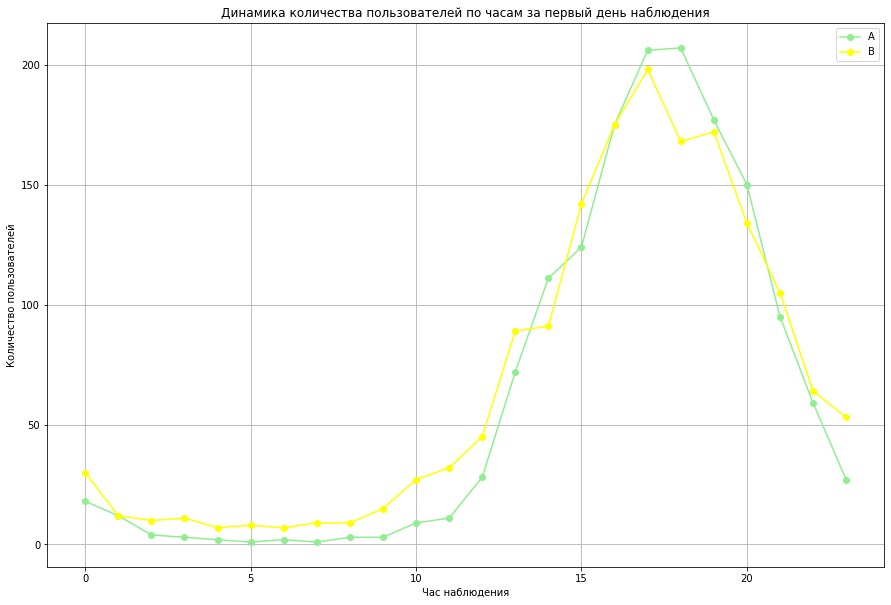

In [20]:
visual = users_by_hours.plot(kind = 'line',
                           x = 'starting_hour',
                           y = ['A','B'],
                           title = 'Динамика количества пользователей по часам за первый день наблюдения',
                           ylabel = 'Количество пользователей',
                           xlabel = 'Час наблюдения',
                           legend = True,
                           grid = True,
                           figsize = (15,10),
                           marker = 'o',
                           color = ['lightgreen','yellow']
                          )
plt.show()

Получившаяся процентная разница и линейный график, отражающий динамику активности пользователей по часам в первый день наблюдения, говорят о том, что существенных различий между группами нет. Существует некоторая разница в почасовой динамике, однако различие между группами невелико, и в каждый час наблюдения разрыв между пользователями двух групп незначителен.

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

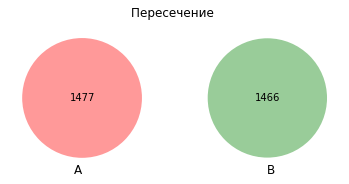

In [21]:
#создаем срез каждой группы пользователем
A = set(sessions_test_part[(sessions_test_part['test_group'] == 'A')]['user_id'].dropna().unique())
B = set(sessions_test_part[(sessions_test_part['test_group'] == 'B')]['user_id'].dropna().unique())

# Строим диаграмму Венна
venn2([A, B], set_labels=('A', 'B'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

Группы не пересекаются

#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


In [22]:
users_by_device = sessions_test_part.pivot_table(index = 'device',
                                                 columns = 'test_group',
                                                 values = 'user_id',
                                                 aggfunc = pd.Series.nunique).reset_index().rename_axis(None, axis=1)

users_by_device['A_share'] = users_by_device['A'] / users_by_device['A'].sum()

users_by_device['B_share'] = users_by_device['B'] / users_by_device['B'].sum()

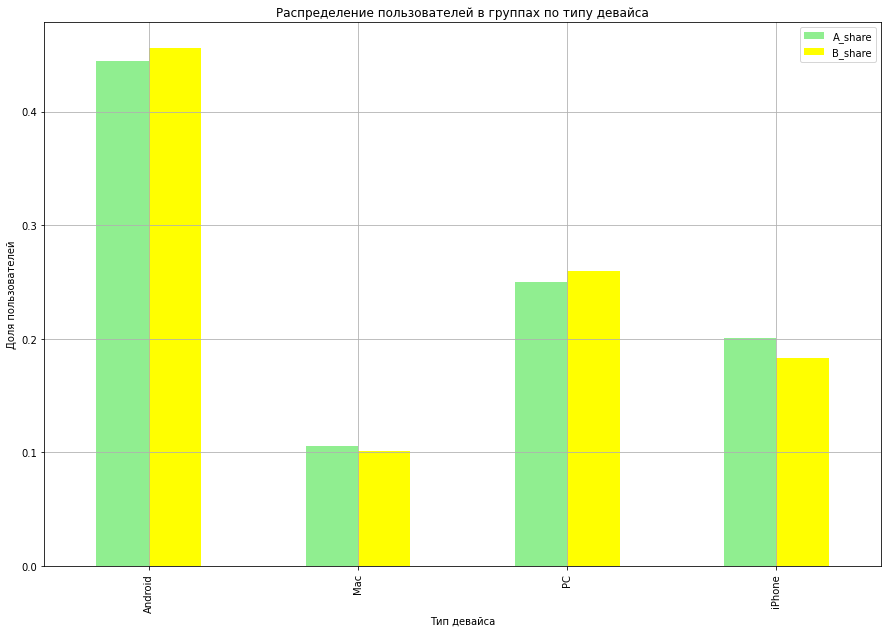

In [23]:
users_by_device.plot(kind = 'bar',
                           x = 'device',
                           y = ['A_share','B_share'],
                           title = 'Распределение пользователей в группах по типу девайса',
                           ylabel = 'Доля пользователей',
                           xlabel = 'Тип девайса',
                           legend = True,
                           grid = True,
                           figsize = (15,10),
                           color = ['lightgreen','yellow']
                          )
plt.show()

На диаграмме видно, что распределение пользователей между группами по типу девайса достаточно равномерное. Существуют некоторые различия, однако они несущественны и не повлиют на точность эксперимента.

Распределение внутри групп по типу устройств неравномерное. В каждой из групп преобладают пользователи с устройствами на базе Android. Меньше всего пользователей с устройствами на базе Mac.

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


In [24]:
users_by_region = sessions_test_part.pivot_table(index = 'region',
                                                 columns = 'test_group',
                                                 values = 'user_id',
                                                 aggfunc = pd.Series.nunique).reset_index().rename_axis(None, axis=1)

users_by_region['A_share'] = users_by_region['A'] / users_by_region['A'].sum()

users_by_region['B_share'] = users_by_region['B'] / users_by_region['B'].sum()

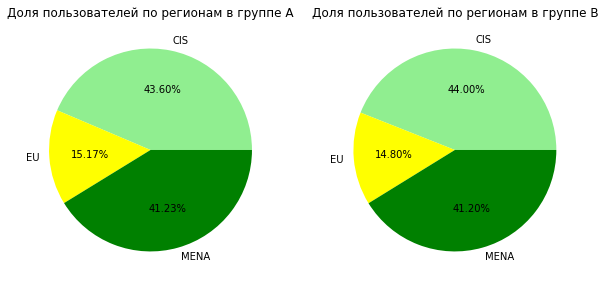

In [25]:
 #задаем расположение диаграмм рядом
fig, (pie1,pie2) = plt.subplots(1,2,figsize=(10,6))

colors = ['lightgreen','yellow','green']

#задаем параметры для первой диаграммы
labels = users_by_region['region']
values = users_by_region['A_share']
pie1.pie(values,labels = labels,colors = colors,autopct = '%1.2f%%')
pie1.set_title('Доля пользователей по регионам в группе A')

#задаем параметры для второй диаграммы
labels = users_by_region['region']
values = users_by_region['B_share']
pie2.pie(values,labels = labels,colors = colors,autopct ='%1.2f%%')
pie2.set_title('Доля пользователей по регионам в группе B')

#выводим диаграммы
plt.show()

#### 3.5. Вывод после проверки A/B-теста

На основании проведенного анализа A/B-теста можно сделать следующие выводы:

- Распределение пользователей между группами равномерное. Существует небольшая процентная разница между количеством пользователей, однако она составляет менее 1% и на корректность проводимого теста не повлияет;
- Полученные выборки являются независимыми, пересечение пользователей из тестовой и контрольной группы обнаржуено не было;
- Распределение пользователей между группами по категориальным переменным равномерное. Общая структура каждой из выборок совпадет.


На основании полученных данных можно заключить, что A/B-тест проходит корректно. Тем не менее за первый день наблюдений количество пользователей, по которым были собраны данные, существенно отличается от изначально рассчитанных значений на основании среднего трафика. Это говорит о том, что вместо рассчитанных четырех дней, длительность теста будет увеличена.

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [26]:
sessions_test['good_session'] = sessions_test.apply(good_session,axis = 1)

In [27]:
participants_count = sessions_test['user_id'].nunique()
print(f'Количество пользователей, участвовавших в проведении эксперимента: {participants_count}')

duration = pd.to_datetime(sessions_test['session_date'].max()) - pd.to_datetime(sessions_test['session_date'].min())
print(f'Длительность эксперимента: {duration}')

Количество пользователей, участвовавших в проведении эксперимента: 30579
Длительность эксперимента: 19 days 00:00:00


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [28]:
sessions_test_grouped = sessions_test.groupby(['session_date',
                                               'test_group']).agg({'session_id': pd.Series.nunique}).reset_index()
sessions_test_grouped_value_counts = sessions_test_grouped['session_date'].nunique()
print(f'Количество значений в каждой группе: {sessions_test_grouped_value_counts}')

Количество значений в каждой группе: 20


In [29]:
from scipy.stats import ttest_ind
group_a = sessions_test_grouped[(sessions_test_grouped['test_group'] == 'A')]['session_id'].copy()
group_b = sessions_test_grouped[(sessions_test_grouped['test_group'] == 'B')]['session_id'].copy()

test_result = ttest_ind(group_a,
                        group_b,
                        alternative = 'two-sided')

alpha = 0.05
test_result.pvalue

if test_result.pvalue <= alpha:
    print(f'Полученное значение p_value:{round(test_result.pvalue,2)} меньше установленного значения alpha:{alpha}.\nОтвергаем нулевую гипотезу о равенстве средних двух выборок')
else:
    print(f'Полученное значение p_value:{round(test_result.pvalue,2)} больше установленного значения alpha:{alpha}.\nНе отвергаем нулевую гипотезу о равенстве средних двух выборок')

Полученное значение p_value:0.94 больше установленного значения alpha:0.05.
Не отвергаем нулевую гипотезу о равенстве средних двух выборок


#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [30]:
a_group = sessions_test[(sessions_test['test_group'] == 'A')].copy()

A = a_group['good_session'].sum() / a_group['session_id'].count() * 100

print(f'Доля успешных сессий в группе A: {round(A,2)}%')

#находим долю успешных сессий для группы B
b_group = sessions_test[(sessions_test['test_group'] == 'B')].copy()

B = b_group['good_session'].sum() / b_group['session_id'].count() * 100

print(f'Доля успешных сессий в группе B: {round(B,2)}%')

#рассчитываем разницу в показателе
difference = fabs(round(A - B,1))

print(f'Разница между долей успешных сессий в группе A и B составляет {difference}%')

Доля успешных сессий в группе A: 30.77%
Доля успешных сессий в группе B: 31.83%
Разница между долей успешных сессий в группе A и B составляет 1.1%


#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [31]:
from statsmodels.stats.proportion import proportions_ztest


m_a = a_group['good_session'].sum()
m_b = b_group['good_session'].sum()
print(f'm_a = {m_a}, m_b = {m_b}')


n_a = len(a_group)
n_b = len(b_group)
print(f'n_a = {n_a}, n_b = {n_b}')

#находим доли успешных сессий в каждой выборке
p_a = m_a / n_a
p_b = m_b / n_b
print(f'p_a = {p_a}, p_b = {p_b}')
print('')

#проверяем предпосылку о достатоточном количестве данных
if (p_a * n_a > 10) and ((1 - p_a) * n_a > 10) and (p_b * n_b > 10) and ((1 - p_b) * n_b > 10):
    print('Размер выборок достаточен для проведения  Z-теста')
else:
    print('Размер выборок недостаточен для проведения Z-теста')

m_a = 15248, m_b = 16059
n_a = 49551, n_b = 50454
p_a = 0.3077233557344958, p_b = 0.31828992745867524

Размер выборок достаточен для проведения  Z-теста


In [32]:
#устанавливаем коэффициент статистической значимости alpha
alpha = 0.05

#проводим z-тест
stats_ztest, p_value_ztest = proportions_ztest([m_a,m_b],
                                               [n_a,n_b],
                                               alternative = 'smaller' #Так как H_1 = p_a < p_b
                                               )
print(f'p_value равняется {p_value_ztest}')

#выводим результаты z-теста
if p_value_ztest <= alpha:
    print(f'Полученное значение p_value: {p_value_ztest} меньше alpha: {alpha}. Принимаем альтернативную гипотезу.')
else:
    print(f'Полученное значение {p_value_ztest} больше alpha: {alpha}. Нулевая гипотеза не может быть отвергнута.')

p_value равняется 0.0001574739988036123
Полученное значение p_value: 0.0001574739988036123 меньше alpha: 0.05. Принимаем альтернативную гипотезу.


#### 4.5. Вывод по результатам A/B-эксперимента

По результатам проведенного эксперимента можно сделать следующие выводы:

- Эксперимент длился 19 дней, в нем было задействовано 30 579 пользователей. Реальная длительность эксперимента получилась выше, чем расчетная на основании среднего количества пользователей в день. Реальное количество пользоваталей в день зачастую оказывалось меньше, чем расчетное значение, поэтому для проведения эксперимента потребовалось больше времени;
- Внедрение нового алгоритма рекоммендаций позволило увеличить долю успешных сессий на 1,1% в тестовой группе;
- Для проверки статистической значимости полученного изменения был проведен Z-тест пропорций. Полученное изменение можно считать статистически значимым на основании значения p_value - 0.0001574739988036123, которое оказалось ниже установленного коэффициента alpha - 5%;
- Так как p_value < alpha, у нас есть основания для того, чтобы принять альтернативную гипотезу, которая говорит о том, что внедрение нового алгоритма рекоммендаций позволит повысить количество пользовательских сессий, в рамках которых просматривается 4 и более страниц;
- Разработанный алгоритм рекоммендаций может быть внедрен в приложение для повышения вовлеченности пользователей.